# Clean and Analyzing Food Borne Disease

This is my first data cleaning and analyzing project, I've ever done! This is a bit messy. In this project, I'll be cleaning up the data and analyzing it from the dataset from the CDC showing the spread of food borne diseases in the US, from 1998-2015.  The dataset can be found on the CDC website <a href="https://www.cdc.gov/fdoss/annual-reports/index.html">here</a> as well as on <a href="https://www.kaggle.com/cdc/foodborne-diseases/kernels">Kaggle</a>

As mentioned, this is my first data cleaning and analyzing project I've done, as time goes on I hope I'll be able to add more things to it later on! 

The question I am trying to find the answer to is: 
<ul>
    <li>What contaminant has caused the most hospitalizations and fatalities in 2010? 2015?</li>
</ul>

In [79]:
#First import the necessary libraries and the dataset to do
#some initial exploration 
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
%pylab
#read the data using the read_csv function
food_disease = pd.read_csv(r'outbreaks.csv')


#Taking a quick look at the data, to avoid a large output
pd.options.display.max_columns = 150
food_disease.head()

Using matplotlib backend: Qt5Agg
Populating the interactive namespace from numpy and matplotlib


,Year,Month,State,Location,Food,Ingredient,Species,Serotype/Genotype,Status,Illnesses,Hospitalizations,Fatalities
0,1998,January,California,Restaurant,NaN,NaN,NaN,NaN,NaN,20,0.0,0.0
1,1998,January,California,NaN,Custard,NaN,NaN,NaN,NaN,112,0.0,0.0
2,1998,January,California,Restaurant,NaN,NaN,NaN,NaN,NaN,35,0.0,0.0
3,1998,January,California,Restaurant,"Fish, Ahi",NaN,Scombroid toxin,NaN,Confirmed,4,0.0,0.0
4,1998,January,California,Private Home/Residence,"Lasagna, Unspecified; Eggs, Other",NaN,Salmonella enterica,Enteritidis,Confirmed,26,3.0,0.0


Initially, there was an error when reading the data. This was because of the it starts an eight-character Unicode escape. This can either be fixed by duplicating all backslashes, or by adding 'r' to prefix the strong to produce a raw string.

Source : <a href="https://stackoverflow.com/questions/1347791/unicode-error-unicodeescape-codec-cant-decode-bytes-cannot-open-text-file">Stack OverFlow: Unicode Error</a>

In [7]:
food_disease.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19119 entries, 0 to 19118
Data columns (total 12 columns):
Year                 19119 non-null int64
Month                19119 non-null object
State                19119 non-null object
Location             16953 non-null object
Food                 10156 non-null object
Ingredient           1876 non-null object
Species              12500 non-null object
Serotype/Genotype    3907 non-null object
Status               12500 non-null object
Illnesses            19119 non-null int64
Hospitalizations     15494 non-null float64
Fatalities           15518 non-null float64
dtypes: float64(2), int64(2), object(8)
memory usage: 1.8+ MB


Just by looking at the info from the food_disease dataset, we have a lot of information. Some of which we don't really need! We are only trying to find out, which contaminant had the most fatalities, so most of these can be deleted.
Also, some columns such as the ingredient have NaN values! So we can get rid of that too.

(NaN: not a number) 

First, let's read the data, but read 'Not Stated' as 'NaN'

In [9]:
food_disease = pd.read_csv(r'C:\Users\whoai\Desktop\CSV files\outbreaks.csv',
                                         na_values ='Not Stated')
food_disease.head()

,Year,Month,State,Location,Food,Ingredient,Species,Serotype/Genotype,Status,Illnesses,Hospitalizations,Fatalities
0,1998,January,California,Restaurant,NaN,NaN,NaN,NaN,NaN,20,0.0,0.0
1,1998,January,California,NaN,Custard,NaN,NaN,NaN,NaN,112,0.0,0.0
2,1998,January,California,Restaurant,NaN,NaN,NaN,NaN,NaN,35,0.0,0.0
3,1998,January,California,Restaurant,"Fish, Ahi",NaN,Scombroid toxin,NaN,Confirmed,4,0.0,0.0
4,1998,January,California,Private Home/Residence,"Lasagna, Unspecified; Eggs, Other",NaN,Salmonella enterica,Enteritidis,Confirmed,26,3.0,0.0


Now we begin dropping the columns that we don't really need. In this case, we're going to drop food,ingredient, 
serotype/genotype, status. 

In [37]:
food_disease_updated = food_disease.drop(food_disease.columns[7:10], axis = 1)
print(food_disease_updated.columns)

Index(['Year', 'Month', 'State', 'Location', 'Food', 'Ingredient', 'Species',
       'Hospitalizations', 'Fatalities'],
      dtype='object')


In [35]:
food_disease_updated.head()

,Year,Month,State,Location,Food,Ingredient,Species,Hospitalizations,Fatalities
0,1998,January,California,Restaurant,NaN,NaN,NaN,0.0,0.0
1,1998,January,California,NaN,Custard,NaN,NaN,0.0,0.0
2,1998,January,California,Restaurant,NaN,NaN,NaN,0.0,0.0
3,1998,January,California,Restaurant,"Fish, Ahi",NaN,Scombroid toxin,0.0,0.0
4,1998,January,California,Private Home/Residence,"Lasagna, Unspecified; Eggs, Other",NaN,Salmonella enterica,3.0,0.0


In [40]:
print(food_disease_updated['Species'].unique())
print(food_disease_updated['Fatalities'].unique())

[nan 'Scombroid toxin' 'Salmonella enterica' 'Shigella boydii' 'Virus'
 'Clostridium perfringens' 'Norovirus genogroup I' 'Staphylococcus aureus'
 'Bacillus cereus' 'Campylobacter unknown' 'Vibrio parahaemolyticus'
 'Ciguatoxin' 'Shigella flexneri' 'Hepatitis A' 'Shigella sonnei'
 'Clostridium perfringens; Staphylococcus aureus'
 'Yersinia enterocolitica' 'Streptococcus group A'
 'Norovirus genogroup II' 'Norovirus unknown'
 'Shigella boydii; Shigella sonnei' 'Bacterium' 'Giardia intestinalis'
 'Escherichia coli, Shiga toxin-producing' 'Cyclospora cayatenensis'
 'Escherichia coli, Enteropathogenic'
 'Salmonella enterica; Salmonella enterica' 'Chemical or toxin'
 'Campylobacter jejuni' 'Clostridium botulinum'
 'Escherichia coli, Enterotoxigenic' 'Mycotoxins' 'Pesticides'
 'Vibrio cholerae' 'Enterobacter cloacae; Bacillus cereus; Bacterium'
 'Trichinella spiralis' 'Cryptosporidium parvum' 'Listeria monocytogenes'
 'Paralytic shellfish poison'
 'Salmonella enterica; Salmonella enterica; S

Before filtering, the data I decided to checkout the various pathogens that were found as well as the fatalities. 

In [43]:
food_disease_updated['Species'].value_counts()

Norovirus genogroup I                                                                                      2744
Salmonella enterica                                                                                        2303
Norovirus genogroup II                                                                                     1424
Norovirus unknown                                                                                           790
Clostridium perfringens                                                                                     732
Staphylococcus aureus                                                                                       532
Escherichia coli, Shiga toxin-producing                                                                     485
Scombroid toxin                                                                                             389
Norovirus                                                                                               

In [44]:
food_disease_updated['Fatalities'].value_counts()

0.0     15342
1.0       125
2.0        27
3.0         9
5.0         3
7.0         3
4.0         3
6.0         2
21.0        1
33.0        1
9.0         1
8.0         1
Name: Fatalities, dtype: int64

Above, I checked the unique values of the species and fatalities, since that's what we're looking for. We should check the unique values and look for any outliers for the fatalities. 

In [45]:
food_disease_updated['Fatalities'].value_counts().sort_values()

21.0        1
33.0        1
9.0         1
8.0         1
6.0         2
5.0         3
7.0         3
4.0         3
3.0         9
2.0        27
1.0       125
0.0     15342
Name: Fatalities, dtype: int64

In [46]:
food_disease_updated['Species'].value_counts().sort_values()

Cryptosporidium parvum; Cryptosporidium unknown                                                                                 1
Salmonella enterica; Campylobacter jejuni; Campylobacter coli                                                                   1
Norovirus genogroup II; Adenovirus                                                                                              1
Norovirus genogroup I; Campylobacter jejuni                                                                                     1
Shigella boydii; Shigella sonnei                                                                                                1
Campylobacter other; Vibrio other; Vibrio cholerae                                                                              1
Listeria unknown                                                                                                                1
Campylobacter unknown; Campylobacter jejuni                                               

In [47]:
food_disease_updated['Hospitalizations'].value_counts().sort_values()

94.0         1
56.0         1
48.0         1
204.0        1
40.0         1
71.0         1
43.0         1
108.0        1
58.0         1
70.0         1
103.0        1
200.0        1
143.0        1
25.0         1
39.0         1
47.0         1
166.0        1
101.0        1
308.0        1
60.0         1
49.0         1
45.0         1
32.0         2
129.0        2
33.0         2
34.0         2
50.0         2
52.0         2
55.0         2
27.0         2
         ...  
18.0         3
31.0         3
28.0         3
24.0         4
35.0         4
36.0         4
20.0         4
21.0         5
22.0         5
30.0         5
17.0         7
19.0         8
16.0         8
23.0         9
15.0        13
13.0        16
12.0        17
14.0        17
11.0        34
9.0         35
10.0        36
8.0         53
7.0         75
6.0        106
5.0        159
4.0        229
3.0        422
2.0        844
1.0       1886
0.0      11439
Name: Hospitalizations, Length: 61, dtype: int64

This information is great, but the question we are trying to answer overall is What contaminant has caused the most hospitalizations and fatalities. 

Now we have to identify the various contaminants and how many hospitalizations and fatalities it caused in 2010 and in 2015.

In [55]:
outbreak_2010 = food_disease_updated[food_disease_updated['Year']==2010]
outbreak_2010.head()

,Year,Month,State,Location,Food,Ingredient,Species,Hospitalizations,Fatalities
14044,2010,January,Arizona,NaN,NaN,NaN,Norovirus genogroup II,0.0,0.0
14045,2010,January,Arizona,NaN,NaN,NaN,NaN,0.0,0.0
14046,2010,January,Arizona,NaN,NaN,NaN,Norovirus genogroup II,0.0,0.0
14047,2010,January,Arizona,NaN,NaN,NaN,NaN,0.0,0.0
14048,2010,January,Arizona,NaN,NaN,NaN,NaN,0.0,0.0


In [54]:
outbreak_2015 = food_disease_updated[food_disease_updated['Year']==2015]
outbreak_2015.head()

,Year,Month,State,Location,Food,Ingredient,Species,Hospitalizations,Fatalities
18222,2015,January,California,Restaurant,NaN,NaN,NaN,0.0,0.0
18223,2015,January,California,Fast Food Restaurant,NaN,NaN,Norovirus unknown,0.0,0.0
18224,2015,January,California,Restaurant,NaN,NaN,Norovirus unknown,0.0,0.0
18225,2015,January,California,NaN,Breads,NaN,Unknown,0.0,0.0
18226,2015,January,Colorado,Restaurant,NaN,NaN,NaN,0.0,0.0


Now that we have a brief idea of the species, hospitalization and fatalities from looking at this we can plot it! 

# 2010

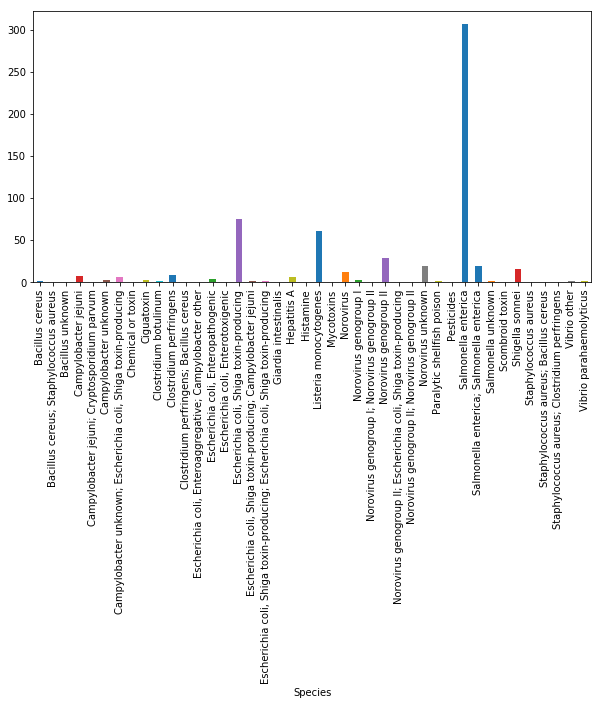

In [75]:
%matplotlib inline #this needs to be added before adding matplotlib
plt.figure(figsize(10,5))
hospitalizations_2010 =outbreak_2010['Hospitalizations'].groupby(
    outbreak_2010['Species'])
hospitalizations_2010.sum().plot(kind='bar')

Just by looking at this, you can see that Salmonella was the one responsible for most of the hospitalizations in 2010. But is that the case with deaths? Let's check it out. 

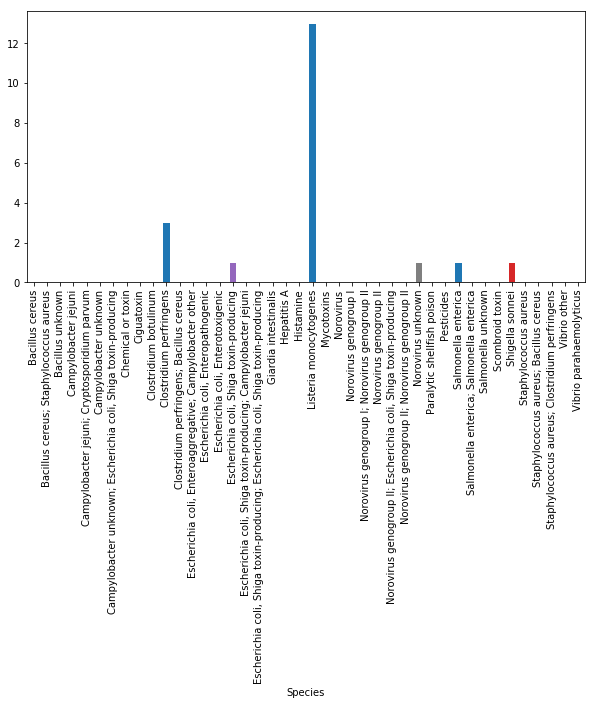

In [73]:
%matplotlib inline
plt.figure(figsize(10,5))
hospitalizations_2010 =outbreak_2010['Fatalities'].groupby(
    outbreak_2010['Species'])
hospitalizations_2010.sum().plot(kind='bar')

Just by graphing the fatalities based by species, while Salmonella caused a small amount of deaths, turns out that it wasn't the one responsible for the most deaths was actually Listeria monocytogenes. Just for curiosity's sake, we can also break it down by what food was partially responsible for containing Listeria. For the sake of simplicity, I'll only be selecting a few of the species that caused deaths, and correlating with the food. 

# 2015

Let's take a look now at the data for 2015. 

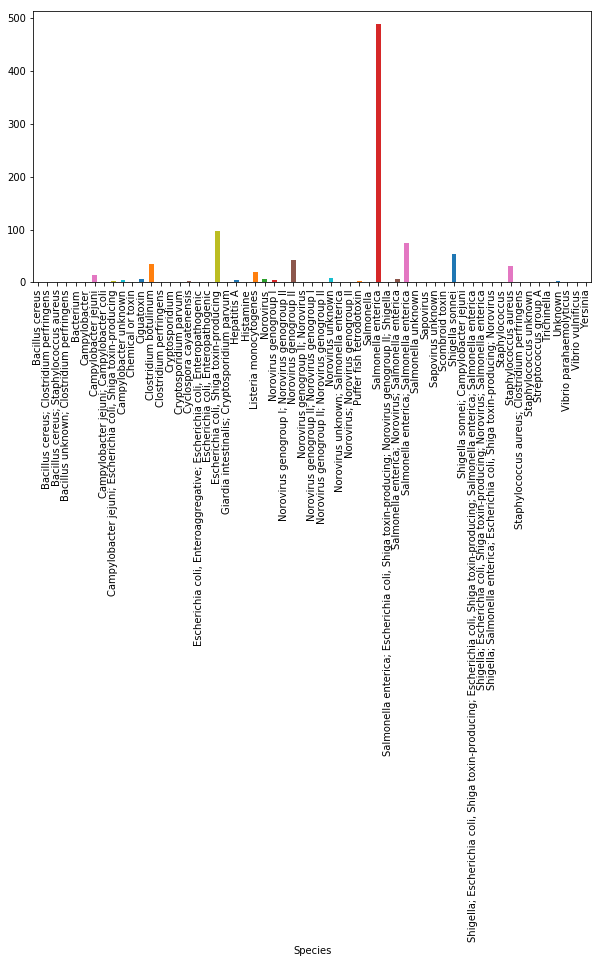

In [74]:
%matplotlib inline #this needs to be added in before running matplotlib
plt.figure(figsize(10,5))
hospitalizations_2015 =outbreak_2015['Hospitalizations'].groupby(
    outbreak_2015['Species'])
hospitalizations_2015.sum().plot(kind='bar')

Again, a version of Salmonella, ended up being the one that caused the most hospitalizations. But again, is that the case for deaths? 

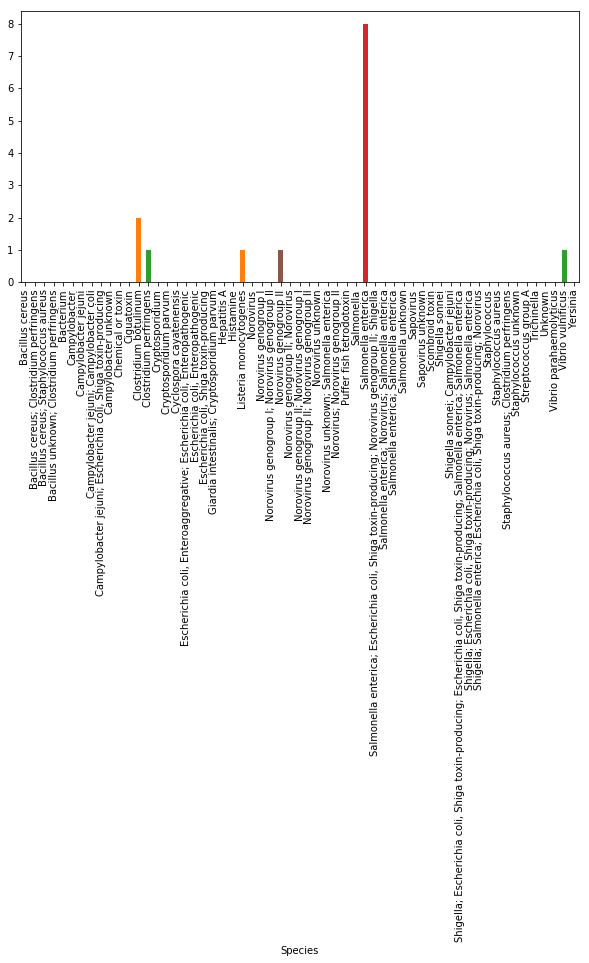

In [78]:
%matplotlib inline
plt.figure(figsize(10,5))
hospitalizations_2015 =outbreak_2015['Fatalities'].groupby(
    outbreak_2015['Species'])
hospitalizations_2015.sum().plot(kind='bar')

So for 2010 and 2015, the pathogens that caused the most fatalities were Listeria Monocytogenes and Salmonella enterica. This was not surprising for me as those two are considered some of the deadliest food microbes that can be found in food. 

Later on, I hope to add something that can show the correlation between what food was probably eaten and the microbe that was in it that caused the hospitalization and deaths.